<a href="https://colab.research.google.com/github/TshidisoKingk/Telco-Customer-Churn/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT REQUIRED LIBRARIES**

In [714]:
!pip install pydotplus

In [715]:
!pip install skompiler

In [716]:
!pip install imbalanced-learn

In [717]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,average_precision_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from skompiler import skompile

# **LOADING THE DATASET**

In [718]:
df = pd.read_csv('customer_churn.csv')
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [719]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


# **Exploratory Data Analysis**

In [720]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [721]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Tenure,0
Usage Frequency,0
Support Calls,0
Payment Delay,0
Subscription Type,0
Contract Length,0
Total Spend,0


In [722]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [723]:
list(df.columns)

['CustomerID',
 'Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [724]:
df.duplicated().sum()

np.int64(0)

In [725]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [726]:
le_subscription = LabelEncoder()
le_contract = LabelEncoder()
le_gender = LabelEncoder()

df["Subscription_Type_Encoded"] = le_subscription.fit_transform(df["Subscription Type"])
df["Contract_Length_Encoded"] = le_contract.fit_transform(df["Contract Length"])
df["Gender_Encoded"] = le_gender.fit_transform(df["Gender"])

In [727]:
df[["Subscription Type", "Subscription_Type_Encoded"]].head()

,Subscription Type,Subscription_Type_Encoded
0,Basic,0
1,Standard,2
2,Premium,1
3,Premium,1
4,Standard,2


In [728]:
df[["Contract Length", "Contract_Length_Encoded"]].head()

,Contract Length,Contract_Length_Encoded
0,Monthly,1
1,Monthly,1
2,Annual,0
3,Quarterly,2
4,Annual,0


In [729]:
df[["Gender", "Gender_Encoded"]].head()

,Gender,Gender_Encoded
0,Female,0
1,Female,0
2,Male,1
3,Male,1
4,Female,0


In [730]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Subscription_Type_Encoded,Contract_Length_Encoded,Gender_Encoded
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,0,1,0
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,2,1,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,1,0,1
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,1,2,1
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,2,0,0


In [731]:
df["Subscription_Type_Encoded"] = le_subscription.fit_transform(df["Subscription Type"])
df["Contract_Length_Encoded"] = le_contract.fit_transform(df["Contract Length"])
df["Gender_Encoded"] = le_gender.fit_transform(df["Gender"])

df1 = df.drop(["Subscription Type", "Contract Length", "Gender"], axis=1)

In [732]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Subscription_Type_Encoded,Contract_Length_Encoded,Gender_Encoded
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1,0,1,0
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0,2,1,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0,1,0,1
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0,1,2,1
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0,2,0,0


In [733]:
df1.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription_Type_Encoded,Contract_Length_Encoded,Gender_Encoded
0,1,22,25,14,4,27,598,9,1,0,1,0
1,2,41,28,28,7,13,584,20,0,2,1,0
2,3,47,27,10,2,29,757,21,0,1,0,1
3,4,35,9,12,5,17,232,18,0,1,2,1
4,5,53,58,24,9,2,533,18,0,2,0,0


# **DATA VISUALIZATION**

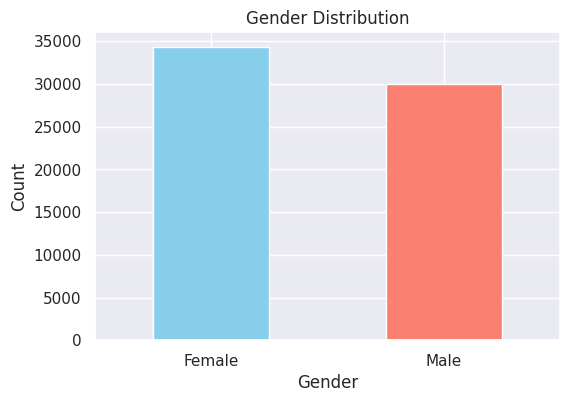

In [734]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


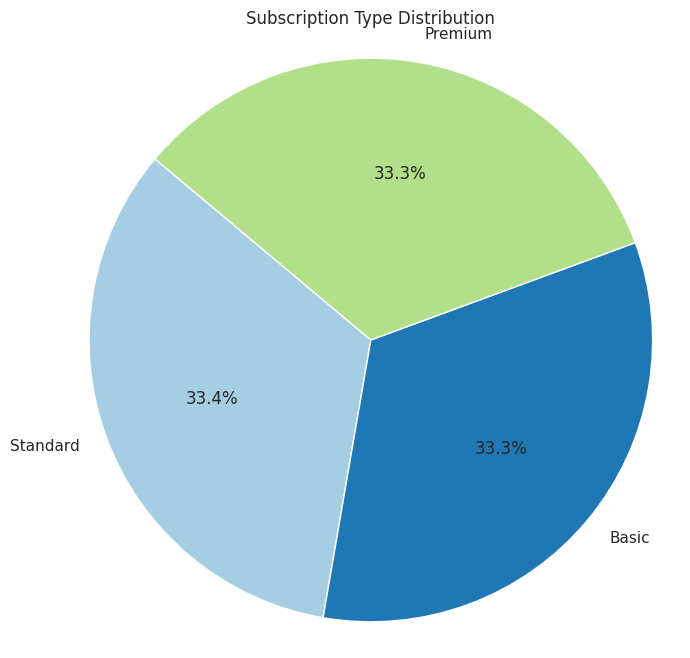

In [735]:
subscription_counts = df['Subscription Type'].value_counts()
labels = subscription_counts.index
sizes = subscription_counts.values

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Subscription Type Distribution')
plt.axis('equal')
plt.show()


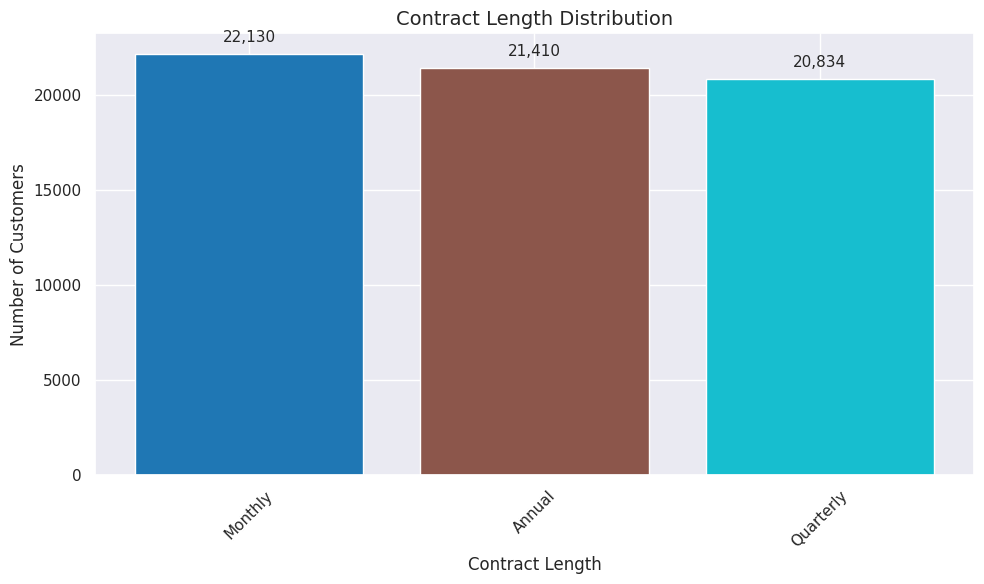

In [736]:
df['Contract Length'] = df['Contract Length'].astype(str).str.strip()
contract_counts = df['Contract Length'].value_counts()

colors = plt.cm.tab10(np.linspace(0, 1, len(contract_counts)))

plt.figure(figsize=(10, 6))
bars = plt.bar(contract_counts.index, contract_counts.values, color=colors)


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 500, f'{int(height):,}',
             ha='center', va='bottom', fontsize=11)

plt.title('Contract Length Distribution', fontsize=14)
plt.xlabel('Contract Length')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


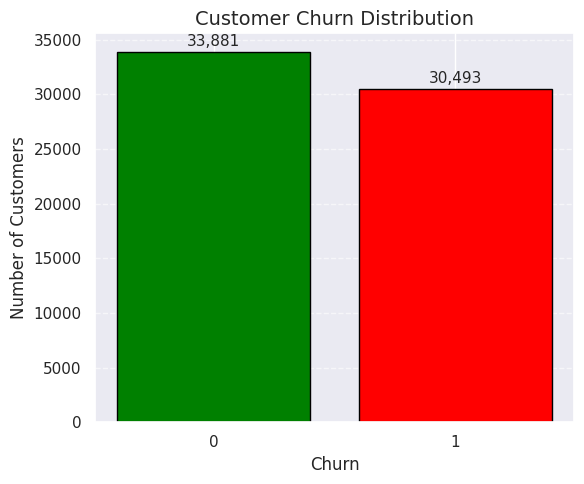

In [737]:
churn_counts = df['Churn'].value_counts().sort_index()

labels = ['0', '1']

plt.figure(figsize=(6, 5))
bars = plt.bar(labels, churn_counts.values, color=['green', 'red'], edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 300, f'{int(height):,}',
             ha='center', va='bottom', fontsize=11)

plt.title('Customer Churn Distribution', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


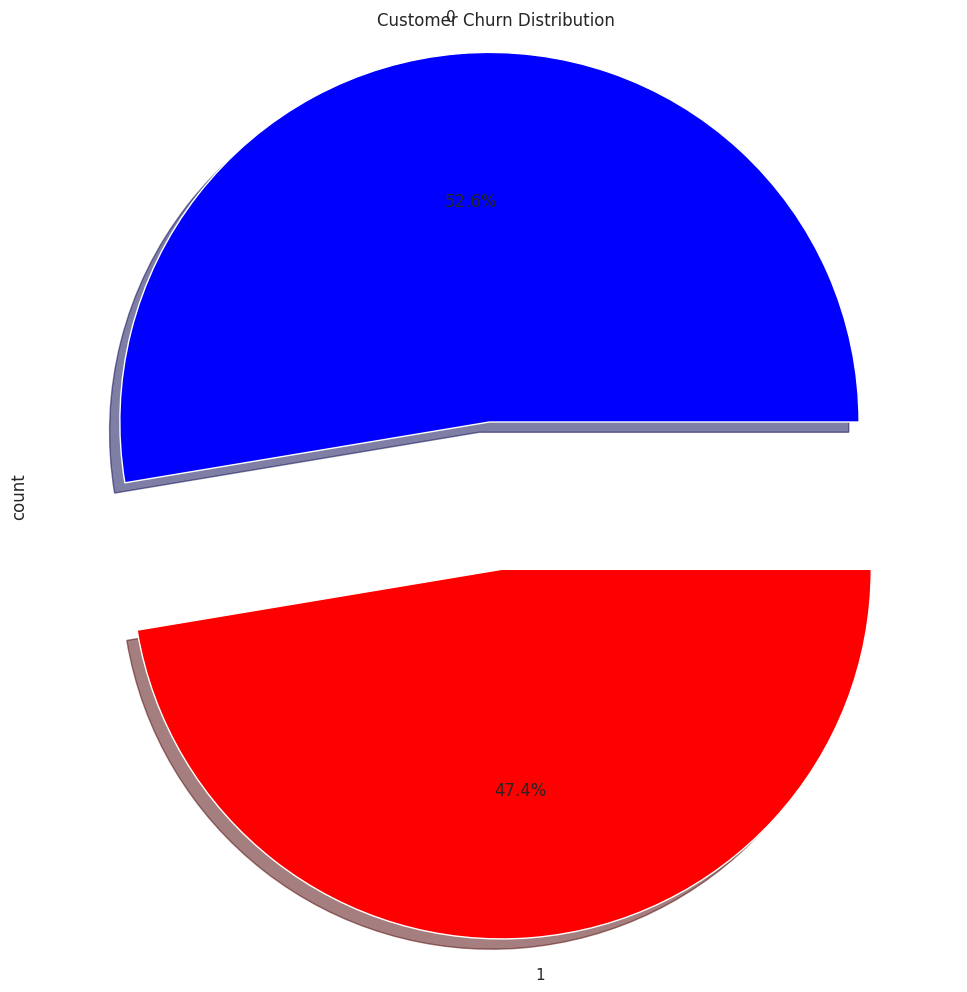

In [738]:
df["Churn"].value_counts().plot.pie(explode=[0.2, 0.2], autopct='%1.1f%%', shadow=True, colors=['blue', 'red'])
plt.title('Customer Churn Distribution')
plt.show()

# **Analysis of Numeric & Categorical Variables by Target**

In [739]:
def target_summary_with_num(dataframe, target, numerical_col):
    """
    Displays the average of a numerical column grouped by the target column.
    """
    mean_values = dataframe.groupby(target).agg({numerical_col: "mean"})
    print(f"Mean of '{numerical_col}' by '{target}':")
    print(mean_values, "\n")


num_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend']


for col in num_cols:
    target_summary_with_num(df, "Churn", col)


Mean of 'Age' by 'Churn':
             Age
Churn           
0      41.132700
1      42.902404 

Mean of 'Tenure' by 'Churn':
          Tenure
Churn           
0      28.826481
1      35.515200 

Mean of 'Usage Frequency' by 'Churn':
       Usage Frequency
Churn                 
0            16.042915
1            14.010593 

Mean of 'Support Calls' by 'Churn':
       Support Calls
Churn               
0           4.500753
1           6.400617 

Mean of 'Payment Delay' by 'Churn':
       Payment Delay
Churn               
0          12.453086
1          22.334897 

Mean of 'Total Spend' by 'Churn':
       Total Spend
Churn             
0       560.541956
1       519.336143 



In [740]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(f"Categorical Column: {categorical_col}")
    summary_df = pd.DataFrame({
        "TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
        "Count": dataframe[categorical_col].value_counts(),
        "Ratio (%)": 100 * dataframe[categorical_col].value_counts() / len(dataframe)
    })
    print(summary_df, end="\n\n\n")

cat_cols = ['Gender', 'Subscription Type', 'Contract Length']

for col in cat_cols:
    target_summary_with_cat(df, "Churn", col)


Categorical Column: Gender
        TARGET_MEAN  Count  Ratio (%)
Gender                               
Female     0.550490  34353  53.364712
Male       0.385797  30021  46.635288


Categorical Column: Subscription Type
                   TARGET_MEAN  Count  Ratio (%)
Subscription Type                               
Basic                 0.482775  21451  33.322459
Premium               0.464964  21421  33.275857
Standard              0.473305  21502  33.401684


Categorical Column: Contract Length
                 TARGET_MEAN  Count  Ratio (%)
Contract Length                               
Annual              0.462167  21410  33.258769
Monthly             0.516087  22130  34.377233
Quarterly           0.440482  20834  32.363998




In [741]:
pd.DataFrame(df1.nunique(), columns = ["Number of unique values"])

,Number of unique values
CustomerID,64374
Age,48
Tenure,60
Usage Frequency,30
Support Calls,11
Payment Delay,31
Total Spend,901
Last Interaction,30
Churn,2
Subscription_Type_Encoded,3


# **Correlation Analysis**

In [742]:
corr = df1[num_cols].corr()
corr

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend
Age,1.000000,-0.007763,-0.038331,0.005014,-0.016132,0.006490
Tenure,-0.007763,1.000000,0.023485,0.060065,0.055963,0.009474
Usage Frequency,-0.038331,0.023485,1.000000,-0.014072,0.031132,0.001527
Support Calls,0.005014,0.060065,-0.014072,1.000000,0.064298,0.021750
Payment Delay,-0.016132,0.055963,0.031132,0.064298,1.000000,-0.031119
Total Spend,0.006490,0.009474,0.001527,0.021750,-0.031119,1.000000


In [743]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:

        sns.set(rc={"figure.figsize": (12, 12)})
        corr_values = corr.round(2)
        sns.heatmap(corr, cmap="RdBu", annot=corr_values)
        plt.show(block=True)
    return drop_list

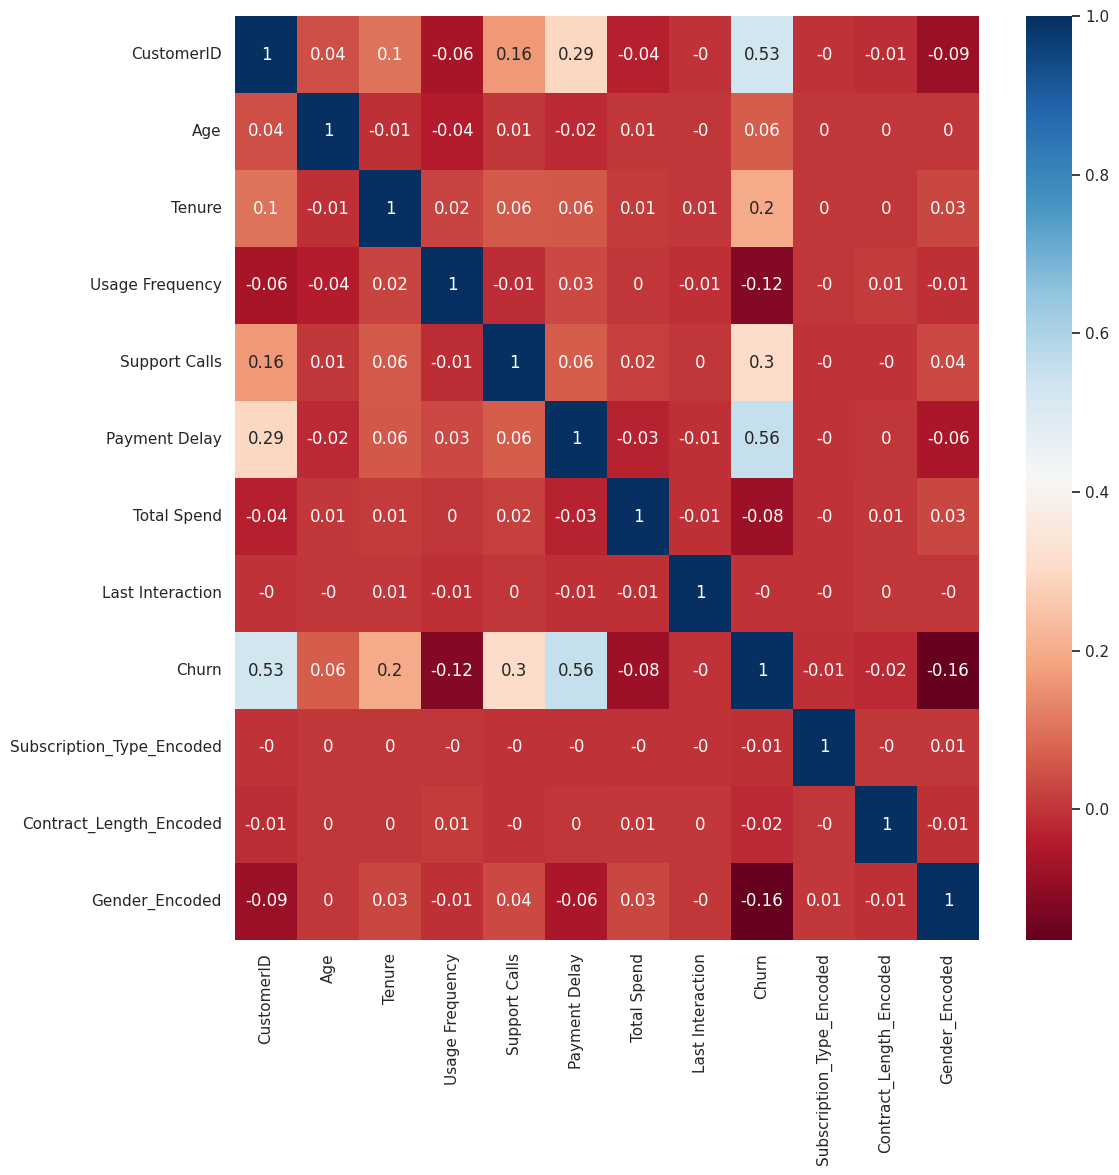

[]

In [744]:
high_correlated_cols(df1, plot=True)

# **Outlier Analysis**

In [745]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [746]:
def check_outlier(dataframe, col_name, plot=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    if outliers.any(axis=None):
        if plot:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=dataframe[col_name])
            plt.title(f'Outliers in {col_name}')
            plt.show()
        return True
    else:
        return False

In [747]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [748]:
for col in num_cols:
    print(col, check_outlier(df1, col))
    if check_outlier(df1, col):
        replace_with_thresholds(df1, col)

Age False
Tenure False
Usage Frequency False
Support Calls False
Payment Delay False
Total Spend False


# **Feature Selection**

In [749]:
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=1)
rfe.fit(X, y)
feature_ranking = rfe.ranking_


print("Feature Rankings:")
for feature, rank in zip(X.columns, feature_ranking):
    print(f"{feature}: {rank}")

feature_ranking_dict = dict(zip(X.columns, feature_ranking))
print("\nFeature Rankings (as dictionary):")
print(feature_ranking_dict)

Feature Rankings:
CustomerID: 1
Tenure: 3
Usage Frequency: 5
Support Calls: 4
Payment Delay: 2
Total Spend: 7
Gender_Encoded: 6

Feature Rankings (as dictionary):
{'CustomerID': np.int64(1), 'Tenure': np.int64(3), 'Usage Frequency': np.int64(5), 'Support Calls': np.int64(4), 'Payment Delay': np.int64(2), 'Total Spend': np.int64(7), 'Gender_Encoded': np.int64(6)}


# **DEALING WITH DATA IMBALANCE**

In [750]:
df_majority = df1[df1["Churn"] == 0]
df_minority = df1[df1["Churn"] == 1]

df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

df2 = pd.concat([df_majority_downsampled, df_minority], ignore_index=True)


print("Target Variable Value Counts:")
print(df2["Churn"].value_counts())


Target Variable Value Counts:
Churn
0    30493
1    30493
Name: count, dtype: int64


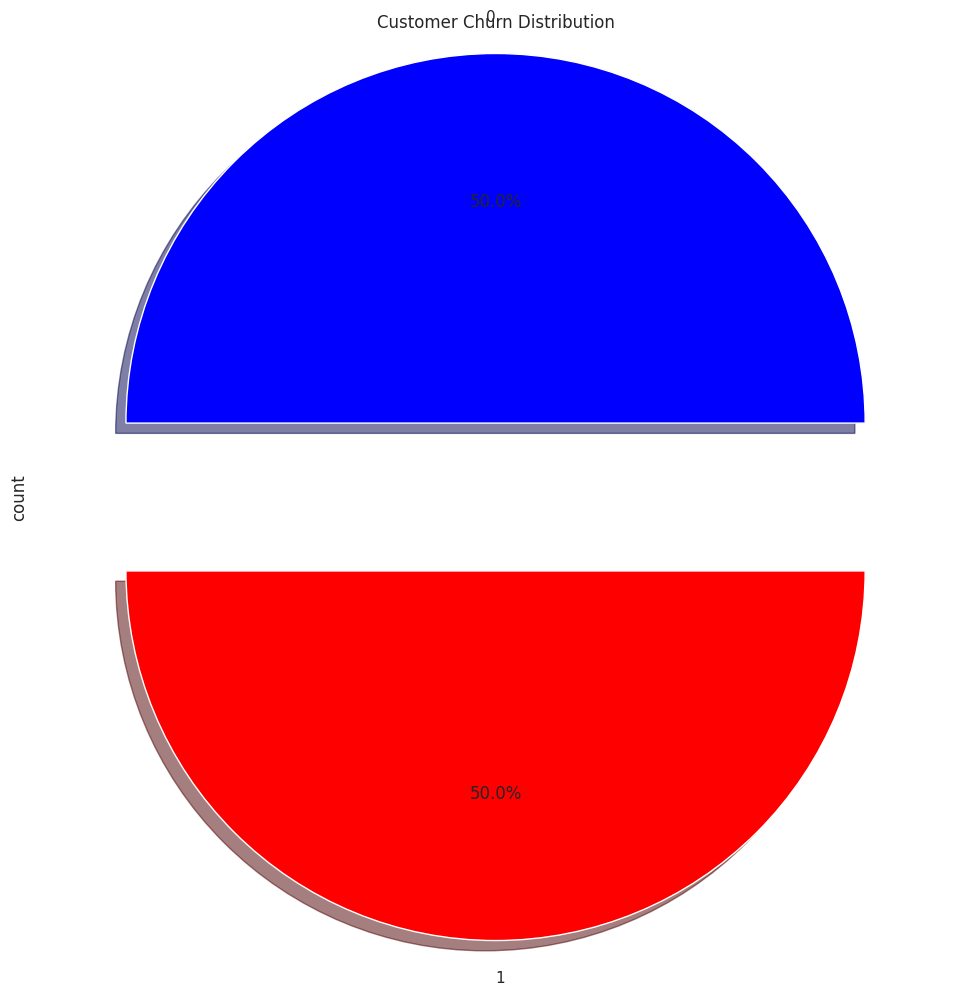

In [751]:
df2["Churn"].value_counts().plot.pie(explode=[0.2, 0.2], autopct='%1.1f%%', shadow=True, colors=['blue', 'red'])
plt.title('Customer Churn Distribution')
plt.show()

# **MODEL TRAINING**

In [752]:
# Standardization

scaler = RobustScaler()

In [753]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [754]:
df2.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription_Type_Encoded,Contract_Length_Encoded,Gender_Encoded
0,2625,63,29,21,4,21,841,10,0,1,0,0
1,8003,27,7,20,9,14,408,26,0,1,2,0
2,22764,33,1,16,4,17,852,15,0,2,1,0
3,31584,42,33,27,6,9,840,26,0,0,2,0
4,18873,50,40,8,9,8,838,21,0,1,2,1


In [755]:
#df2.columns = df2.columns.str.replace(' ', '_')

In [756]:
#DEPENDANT VIARABLE

y = df2["Churn"]

In [757]:
#INDEPENDANT VIARABLES

X = df2.drop(["Churn", "Subscription_Type_Encoded", "Last Interaction", "Age", "Contract_Length_Encoded"], axis=1)

In [758]:
models = [('Logistic Regression', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('Decision Tree Classifier', DecisionTreeClassifier(random_state=12345)),
          ('Random Forest Classifier', RandomForestClassifier(random_state=12345)),
          ]

In [759]:
base_models_metrics = []

******************************************** Logistic Regression ***************************************************************************


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy: 0.773
AUC: 0.8614
Recall: 0.8386
Precision: 0.7414
F1: 0.787
Average Precision-Recall Score: 0.8589

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     30493
           1       0.74      0.84      0.79     30493

    accuracy                           0.77     60986
   macro avg       0.78      0.77      0.77     60986
weighted avg       0.78      0.77      0.77     60986



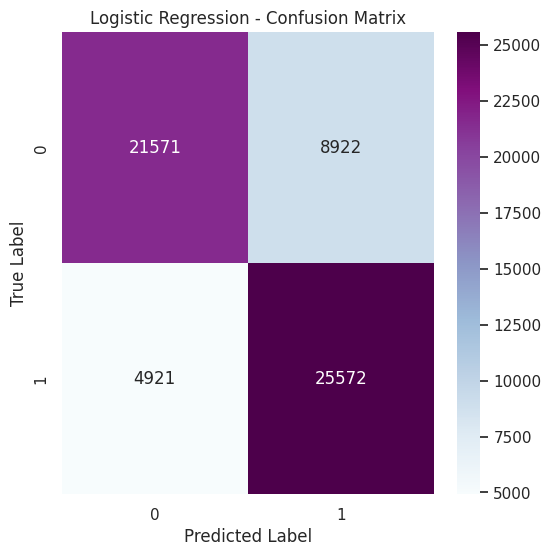

******************************************** KNN ***************************************************************************
Accuracy: 0.7743
AUC: 0.825
Recall: 0.6809
Precision: 0.8373
F1: 0.751
Average Precision-Recall Score: 0.8549

Classification Report:

              precision    recall  f1-score   support

           0       0.73      0.87      0.79     30493
           1       0.84      0.68      0.75     30493

    accuracy                           0.77     60986
   macro avg       0.78      0.77      0.77     60986
weighted avg       0.78      0.77      0.77     60986



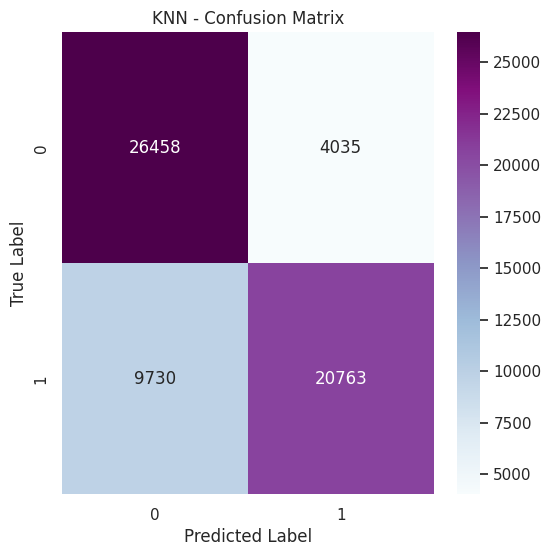

******************************************** Decision Tree Classifier ***************************************************************************
Accuracy: 0.9569
AUC: 0.9569
Recall: 0.9573
Precision: 0.9565
F1: 0.9569
Average Precision-Recall Score: 0.937

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     30493
           1       0.96      0.96      0.96     30493

    accuracy                           0.96     60986
   macro avg       0.96      0.96      0.96     60986
weighted avg       0.96      0.96      0.96     60986



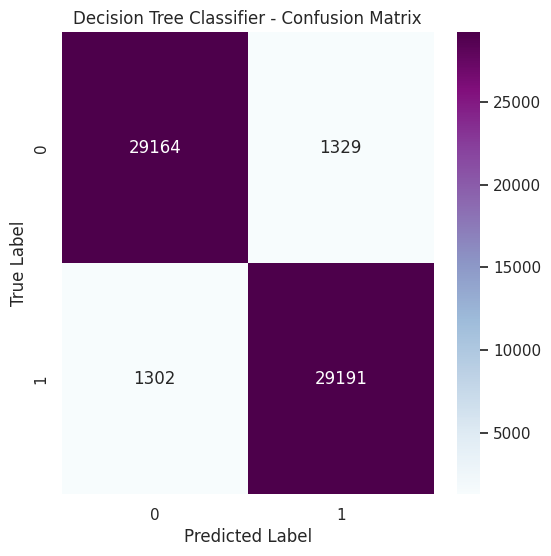

******************************************** Random Forest Classifier ***************************************************************************
Accuracy: 0.9626
AUC: 0.9962
Recall: 0.9438
Precision: 0.9807
F1: 0.9619
Average Precision-Recall Score: 0.9963

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     30493
           1       0.98      0.94      0.96     30493

    accuracy                           0.96     60986
   macro avg       0.96      0.96      0.96     60986
weighted avg       0.96      0.96      0.96     60986



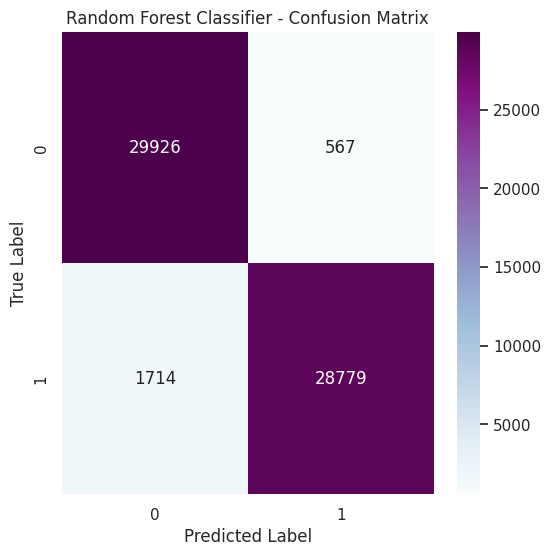

In [762]:
base_models_metrics = []

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models:
    print(f"******************************************** {name} ***************************************************************************")

    accuracies = []
    aucs = []
    recalls = []
    precisions = []
    f1s = []
    avg_precisions = []
    all_y_true = []
    all_y_pred = []
    all_y_proba = []
    conf_matrix_sum = np.array([[0, 0], [0, 0]])

    # Perform Stratified K-Fold Cross-Validation
    for train_index, test_index in skf.split(X, y):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)

        # Predict probabilities and classes
        y_pred_fold = model.predict(X_test_fold)
        y_proba_fold = model.predict_proba(X_test_fold)[:, 1]

        # Append true and predicted values
        all_y_true.extend(y_test_fold)
        all_y_pred.extend(y_pred_fold)
        all_y_proba.extend(y_proba_fold)

        accuracies.append(accuracy_score(y_test_fold, y_pred_fold))
        aucs.append(roc_auc_score(y_test_fold, y_proba_fold))
        recalls.append(recall_score(y_test_fold, y_pred_fold))
        precisions.append(precision_score(y_test_fold, y_pred_fold))
        f1s.append(f1_score(y_test_fold, y_pred_fold))
        avg_precisions.append(average_precision_score(y_test_fold, y_proba_fold))


        conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)
        conf_matrix_sum += conf_matrix

    # Calculate average metrics
    accuracy = round(np.mean(accuracies), 4)
    auc = round(np.mean(aucs), 4)
    recall = round(np.mean(recalls), 4)
    precision = round(np.mean(precisions), 4)
    f1 = round(np.mean(f1s), 4)
    avg_precision = round(np.mean(avg_precisions), 4)

    base_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1,
        "Average Precision": avg_precision
    })

    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")
    print(f"Average Precision-Recall Score: {avg_precision}")
    print("\nClassification Report:\n")
    print(classification_report(all_y_true, all_y_pred))

    # Plot confusion matrix
    labels = ['0', '1']
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix_sum, annot=True, fmt="d", cmap='BuPu',
                xticklabels=labels, yticklabels=labels)
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
